<a href="https://colab.research.google.com/github/Gokulnaath17/Gokulnaath17/blob/main/Sentiment_analysis_reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df= pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")

# Data preprocessing function
def preprocess_text(text):
    # Cleaning
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)

    # Tokenization
    tokens = text.split()

    # Stop Words Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Split data into features and labels
X = df['cleaned_text']
y = df['label']

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.74      0.73       263
           1       0.77      0.74      0.76       305

    accuracy                           0.74       568
   macro avg       0.74      0.74      0.74       568
weighted avg       0.74      0.74      0.74       568



**Hyperparater tuning**

In [24]:
# Hyperparameter Tuning using Grid Search

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {best_score}")

# Model Training
model = best_model
model.fit(X_train, y_train)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7453744493392069


LogisticRegression(C=1, solver='liblinear')

**TEST DATA( without tuning )**

In [25]:
# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')

# Define the preprocessing function (same as before)
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the test text column
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Transform the test data using the trained TF-IDF vectorizer
X_test_vectorized = vectorizer.transform(test_df['cleaned_text'])

# Predict stress using the trained model
test_predictions = model.predict(X_test_vectorized)

# Add predictions to the test data frame
test_df['predicted_label'] = test_predictions



**TEST DATA( tuned model )**

In [27]:
# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')

# Define the preprocessing function (same as before)
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the test text column
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Transform the test data using the trained TF-IDF vectorizer
X_test_vectorized = vectorizer.transform(test_df['cleaned_text'])

# Predict stress using the trained model
test_predictions = best_model.predict(X_test_vectorized)

# Add predictions to the test data frame
test_df['predicted_label'] = test_predictions


**Comparing the models**

Original Model Accuracy: 0.7429577464788732
Best Model Accuracy: 0.7429577464788732
Accuracy Improvement: 0.0


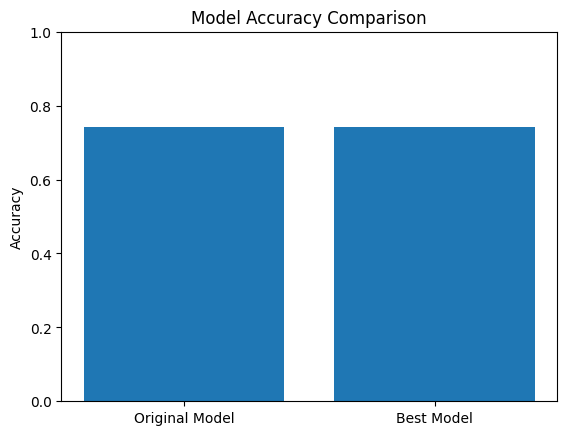

In [28]:


#Original Model Evaluation
y_pred_original = model.predict(X_test)  # Predictions from original model
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Original Model Accuracy: {accuracy_original}")



# Best Model Evaluation
y_pred_best = best_model.predict(X_test)  # Predictions from best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best}")

# Comparison
print(f"Accuracy Improvement: {accuracy_best - accuracy_original}")

#  Visualization
import matplotlib.pyplot as plt
plt.bar(['Original Model', 'Best Model'], [accuracy_original, accuracy_best])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

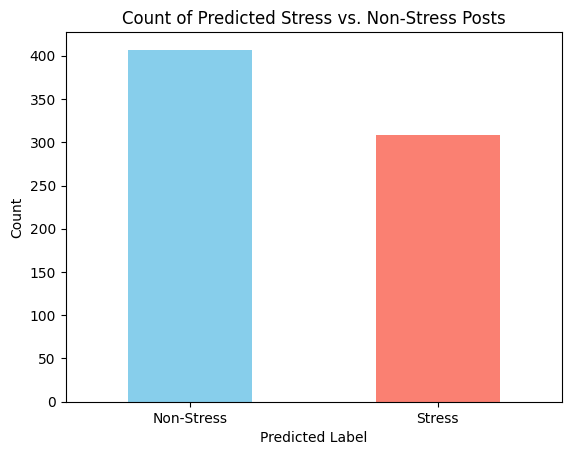

In [29]:
# Count the occurrences of each predicted label
label_counts = test_df['predicted_label'].value_counts()

# Plot the bar chart
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Predicted Stress vs. Non-Stress Posts')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Stress', 'Stress'], rotation=0)
plt.show()



In [30]:
# Combine text for stressed and non-stressed posts
stress_text = ' '.join(test_df[test_df['predicted_label'] == 1]['cleaned_text'])
non_stress_text = ' '.join(test_df[test_df['predicted_label'] == 0]['cleaned_text'])

# Tokenize the text
stress_words = stress_text.split()
non_stress_words = non_stress_text.split()

# Count the occurrences of each word
stress_word_counts = Counter(stress_words)
non_stress_word_counts = Counter(non_stress_words)

# Get the most common words
most_common_stress_words = stress_word_counts.most_common(10)  # Adjust the number as needed
most_common_non_stress_words = non_stress_word_counts.most_common(10)

# Display the most common words
print("Most Common Words in Stressed Posts:")
for word, count in most_common_stress_words:
    print(f"{word}: {count}")

print("\nMost Common Words in Non-Stressed Posts:")
for word, count in most_common_non_stress_words:
    print(f"{word}: {count}")

Most Common Words in Stressed Posts:
Im: 351
like: 246
feel: 198
dont: 177
get: 166
know: 160
time: 145
Ive: 140
really: 124
cant: 123

Most Common Words in Non-Stressed Posts:
would: 112
time: 89
year: 84
get: 82
Im: 73
friend: 68
like: 67
dont: 66
thing: 58
help: 56
